## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [106]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [107]:
df = pd.read_csv('ab_data.csv')
df.head(7)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [108]:
print ("The number of rows in the datase:",len(df))

The number of rows in the datase: 294478


c. The number of unique users in the dataset.

In [109]:
print ("The number of unique users in the dataset.:",df.nunique()['user_id'])

The number of unique users in the dataset.: 290584


d. The proportion of users converted.

In [110]:
print ("Propotion of users converted:",df.converted.mean())

Propotion of users converted: 0.119659193556


e. The number of times the `new_page` and `treatment` don't line up.

In [111]:
condition_first = df.query("group == 'treatment' and landing_page == 'old_page' ")
condition_second = df.query("group == 'control' and landing_page == 'new_page' ")

count = len(condition_first)+ len(condition_second)
print ("The number of times the new_page and treatment don't line up:",count)

The number of times the new_page and treatment don't line up: 3893


f. Do any of the rows have missing values?

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**As shown above no null values in the dataset**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [113]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page' ").index, inplace = True)
df.drop(df.query("group == 'control' and landing_page == 'new_page' ").index, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [114]:
df.to_csv('dataset2.csv', index = False)

In [115]:
df2 = pd.read_csv('dataset2.csv')
df2.head(7)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


In [116]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [117]:
#same why that i did for the first dataset using :nunique()
print ("Number of unique user id:",df2.nunique()['user_id'])

Number of unique user id: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [118]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [119]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [148]:
#remove the first duplicate row
df2 = df2.drop_duplicates(['user_id'], keep='last')

#and check the row is delated
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,1,1.0,0.0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [149]:
convert_probability = df2.converted.mean()
print("Probability of individual converting is:", convert_probability)

Probability of individual converting is: 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [150]:
#filter the data with condition to select the control group only
control_convert_prob= df2.query('group =="control"').converted.mean()
print("Probability of control group converting is :", control_convert_prob)

Probability of control group converting is : 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [151]:
treatment_convert_prob = df2.query('group =="treatment"').converted.mean()
print("Probability of treatment group converting is :", treatment_convert_prob)

Probability of treatment group converting is : 0.118808065515


d. What is the probability that an individual received the new page?

In [152]:
new_page_probability = (df2['landing_page'] == 'new_page').mean()
print ("The probability that an individual received the new page is :\n",new_page_probability)

The probability that an individual received the new page is :
 0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Since the probability that an individual received the new page is 0.5 
and Probability of control group converting is higher than the Probability of treatment group converting there is no evidence that the new page leads to more conversions, so i can not confirm that the new page will increase the converting rpobability for the users**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H_0**: p_{new} - p_{old} &lt;= 0

**H_1**: p_{new} - p_{old} &gt; 0

H0(Null Hypothesis): New page has either same coversion rate or worse than old page. 
H1(Alternative Hypothesis): New page has better conversion rate than old page.


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [153]:
p_new = df2['converted'].mean()
print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [154]:
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c. What is $n_{new}$?

In [155]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [156]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [157]:
new_page_converted = np.random.choice([0,1],size=n_new,p=[(1-p_new),p_new])
print(new_page_converted)

[0 0 0 ..., 0 0 1]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [158]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[(1-p_old),p_old])
print(old_page_converted)

[0 0 0 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [159]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
print(p_diff)

0.000383584754402


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [160]:
#its like we are bootstrapping a 10,000 sample ( chosing a random sample ) 
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    different = new_page_converted - old_page_converted 
    p_diffs.append(different)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

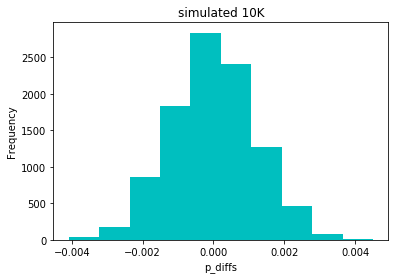

In [161]:
plt.hist(p_diffs, color ="c")
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('simulated 10K');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [162]:
act_diff = df2[df2['group']=='treatment']['converted'].mean()-df2[df2['group']=='control']['converted'].mean()
print(act_diff)

-0.00157823898536


In [163]:
p_diffs = np.array(p_diffs)
p_diffs

array([  6.70099361e-05,  -6.14431948e-04,  -1.28215791e-03, ...,
         1.37454738e-03,  -4.56345773e-04,   1.14754220e-03])

In [164]:
(p_diffs> act_diff).mean()

0.90380000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**what we just computed in part j is :**
- The actual diffrent between new and old page.
- 'p_diffs' between new page and old page based Simulate 10,000 values. 
- The P VALUES, wich can help us to prove wether the null hypothesis is true or not.

**The results led us to confirm that the null hypothesis is true because the old and the new pages perform almost the same. 
As show above, the old page performed a bit better than the new one.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [165]:
import statsmodels.api as sm


convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [166]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
print(z_score, p_value)

1.31092419842 0.094941687241


In [167]:
from scipy.stats import norm

#how significant our z-score 
#using Cumulative distribution function.
print(norm.cdf(z_score))

#if we choose 95% as confidence level
#using Percent point function
print(norm.ppf(1-(0.05)))

0.905058312759
1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We have to accept the null hypothesis because  the z-score of 1.31092419842 is less than the critical value of 1.64485362695**

**It is obviosly agree with the findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [169]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [170]:
import statsmodels.api as sm
Logit=sm.Logit(df2['converted'],df2[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [171]:
result1 = Logit.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:21:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- **The P-value associated with ab_page is 0.190 and greater than alpha**
 
- **It is a two-tailed test, in the Logistic Regression we do two test**

- **In Part II was one side test only**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Many Variables can influence for example : Age, Region, Gender or Time.** 

**We can use some of it but any time we include a new predictor variable without changing in sample size we lose a degree of freedom because variables with high correlations predictor can lead to unreliable and unstable estimates of regression coefficients**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [172]:
df_countries = pd.read_csv('countries.csv')

In [173]:
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [174]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [176]:
df3[['CA','US','UK']]=pd.get_dummies(df3['country'])
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,US,UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [178]:
df3['intercept'] = 1


model2 = sm.Logit(df3['converted'], df3[['intercept','treatment','CA','US']])
result2 = model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        21:24:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""


**conclusion**
- we accept the Null Hypothesis and Reject the Alternate Hypothesis.
- There is no evidence to say new treatment page better than the other.
- The performance of the old page was found better (by miniscule values only) as computed by different techniques.



**Refrences**

- [knowledgetack](http://knowledgetack.com/python/statsmodels/proportions_ztest/).

- [docs.scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

- [stackoverflow](https://stackoverflow.com/questions/12412895/calculate-probability-in-normal-distribution-given-mean-std-in-python).

- [statsmodels](https://www.statsmodels.org/stable/index.html).

- [knowledgetack](http://knowledgetack.com/python/statsmodels/proportions_ztest/).

- [youtube](https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be).


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])